In [1]:
import pandas as pd
data=pd.read_excel("Data_Wordle.xlsx",sheet_name="Sheet1")
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1
355,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2
356,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4
357,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2


In [2]:
data['Date']=pd.to_datetime(data['Date'])
data.sort_values(by='Date',inplace=True)
data=data.reset_index(drop=True)
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1


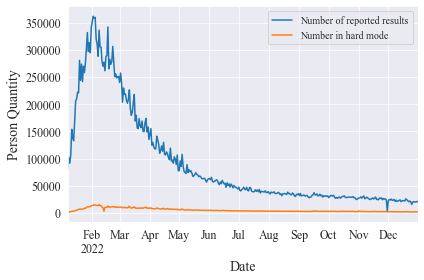

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
ax=data.plot(x='Date', y=['Number of reported results', 'Number in hard mode'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Person Quantity',fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("figures\\报告结果每日变化.pdf")

In [4]:
data['WordLength'] = data['Word'].apply(len)
data['SumRate']=data.loc[:,['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']].sum(axis=1)
data['HardRate']=data['Number in hard mode']/data['Number of reported results']
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),WordLength,SumRate,HardRate
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,5,100,0.016892
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,5,100,0.017369
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,5,100,0.020912
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,5,100,0.020927
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,5,101,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,5,100,0.096365
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,5,99,0.096081
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,5,100,0.095945
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,5,99,0.093048


In [5]:
data[data['WordLength']!=5]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),WordLength,SumRate,HardRate
5,2022-01-12,207,favor,137586,3073,1,4,15,26,29,21,4,6,100,0.022335
112,2022-04-29,314,tash,106652,7001,2,19,34,27,13,4,1,4,100,0.065643
323,2022-11-26,525,clen,26381,2424,1,17,36,31,12,3,0,4,100,0.091884
343,2022-12-16,545,rprobe,22853,2160,0,6,24,32,24,11,3,6,100,0.094517


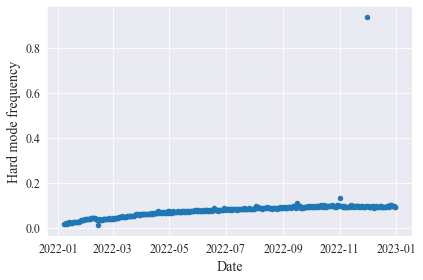

In [6]:
ax=data.plot.scatter(x='Date', y='HardRate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Hard mode frequency',fontsize=14)
plt.tight_layout()
plt.savefig('figures\\每日选择困难模式人数频率变化.pdf')

In [7]:
data['HardRateDiff']=data['HardRate'].diff()

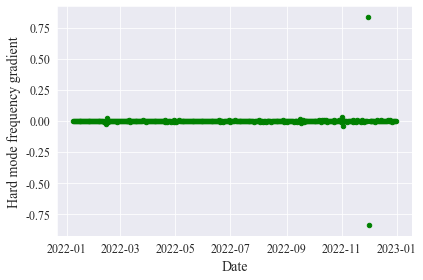

In [8]:
data.plot.scatter(x='Date', y='HardRateDiff',color='g')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Hard mode frequency gradient',fontsize=14)
plt.tight_layout()
plt.savefig('figures\\每日选择困难模式人数频率变化率.pdf')

In [9]:
data=data.fillna(0)
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),WordLength,SumRate,HardRate,HardRateDiff
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,5,100,0.016892,0.000000
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,5,100,0.017369,0.000477
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,5,100,0.020912,0.003543
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,5,100,0.020927,0.000015
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,5,101,0.019606,-0.001321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,5,100,0.096365,-0.005729
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,5,99,0.096081,-0.000283
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,5,100,0.095945,-0.000136
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,5,99,0.093048,-0.002897


In [10]:
data[abs(data['HardRateDiff'])>=0.02]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),WordLength,SumRate,HardRate,HardRateDiff
37,2022-02-13,239,robin,277471,3249,1,6,29,34,21,8,1,5,100,0.011709,-0.022787
38,2022-02-14,240,cynic,261521,10343,1,6,25,33,22,11,2,5,100,0.039549,0.027840
252,2022-09-16,454,parer,37309,4130,0,0,4,11,15,22,48,5,100,0.110697,0.020396
298,2022-11-01,500,piney,27502,3667,0,1,14,37,33,14,2,5,101,0.133336,0.036272
299,2022-11-02,501,inept,27670,2640,0,6,30,39,20,6,1,5,102,0.095410,-0.037926
327,2022-11-30,529,study,2569,2405,0,6,30,33,19,10,2,5,100,0.936162,0.838601
328,2022-12-01,530,eject,22628,2200,0,2,11,35,36,14,2,5,100,0.097225,-0.838937
